## 먼저 EDA를 통해 데이터의 형태를 살펴본다

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
from google.colab import files
files.upload()

Saving vgames2.csv to vgames2 (1).csv


{'vgames2.csv': b'"","Name","Platform","Year","Genre","Publisher","NA_Sales","EU_Sales","JP_Sales","Other_Sales"\n"1","Candace Kane\'s Candy Factory","DS","2008","Action","Destineer","0.04","0","0","0"\n"2","The Munchables","Wii","2009","Action","Namco Bandai Games","0.17","0","0","0.01"\n"3","Otome wa Oanesama Boku ni Koi Shiteru Portable","PSP","2010","Adventure","Alchemist","0","0","0.02","0"\n"4","Deal or No Deal: Special Edition","DS","2010","Misc","Zoo Games","0.04","0","0","0"\n"5","Ben 10 Ultimate Alien: Cosmic Destruction","PS3","2010","Platform","D3Publisher","0.12","0.09","0","0.04"\n"6","Power Pro Kun Pocket 8","DS","2005","Sports","Konami Digital Entertainment","0","0","0.14","0"\n"7","JASF: Jane\'s Advanced Strike Fighters","PC","2011","Simulation","Deep Silver","0.02","0.01","0","0"\n"8","Samurai Warriors: State of War","PSP","2005","Action","Tecmo Koei","0.07","0","0.11","0.01"\n"9","Imabikisou","PS3","2007","Adventure","Sega","0","0","0.04","0"\n"10","The Penguins of M

In [43]:
df = pd.read_csv('vgames2.csv', index_col  = 0)
df.shape

(16598, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [45]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [46]:
df.Name.nunique()

# 5000여 개의 게임은 중복되어 있다
# 따라서 이후 결측치를 채울 때, 중복되는 항복이 있는지 확인한다

11493

In [47]:
# 전처리 전, df 원본 유지를 위해 copy본에 전처리를 해준다

df_clean = df.copy()
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [48]:
df_clean[df_clean['Year'].isnull()].shape

(271, 9)

In [49]:
df_clean[df_clean['Genre'].isnull()].shape

(50, 9)

In [50]:
df_clean[df_clean['Publisher'].isnull()].shape

(58, 9)

In [51]:
df_clean.duplicated(['Name']).sum()

5105

In [52]:
dup_name = list(set(df_clean[df_clean.duplicated(['Name'])]['Name']))
len(dup_name)

2775

In [53]:
non_dup_name = list(set(df_clean['Name']) - set(dup_name))
len(non_dup_name) 

# 11493개의 서로 다른 게임들 중 2775개는 중복되어 나타나고 8718개는 한 번만 나타남

8718

In [54]:
# list의 각 요소에 해당하는 값을 갖는 행을 dataframe에서 추출해 또 다른 dataframe으로 만드는 더 간단한 방법 없을까?
# dup 라는 새로운 행 만들어 추가한 뒤 이 값이 True인 dataframe을 추출할까?

df_dup_name = pd.DataFrame(dup_name, columns = ['Name'])
df_dup_name['Dup'] = True
df_non_dup = pd.DataFrame(non_dup_name, columns = ['Name'])
df_non_dup['Dup'] = False
df_dup_class = pd.concat([df_dup_name, df_non_dup])
df_dup_class.head()

,Name,Dup
0,Avatar: The Last Airbender - The Burning Earth,True
1,Disney Sports Football,True
2,Legends of WrestleMania,True
3,Nickelodeon Party Blast,True
4,Call of Duty: Modern Warfare 2,True


In [55]:
df_dup_class.Dup.value_counts()

False    8718
True     2775
Name: Dup, dtype: int64

In [56]:
df_merge = pd.merge(df_clean, df_dup_class, on = 'Name')
df_merge.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,True
1,Candace Kane's Candy Factory,Wii,2008.0,Action,Destineer,0.14,0,0,0.01,True
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01,False
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0,False
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0,False


In [57]:
df_merge.shape

(16598, 10)

In [58]:
df_merge.Dup.value_counts()

False    8718
True     7880
Name: Dup, dtype: int64

In [59]:
df_dup = df_merge[df_merge.Dup == True]
df_non_dup = df_merge[df_merge.Dup == False]
df_dup.shape, df_non_dup.shape

((7880, 10), (8718, 10))

이 밑의 df_clean.duplicated를 통해 모든 중복된 행들을 구하는 것은 잘못된 방법이다

왜냐하면 맨 처음 나오는 행은 중복이 아니라고 처리되므로, 이 행까지 구하려면 다른 방법을 사용해야하기 때문이다

In [ ]:
df_dup = df_clean[df_clean.duplicated(['Name'])]
df_dup.shape

(5105, 9)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [ ]:
df[df['Name'] == 'Ice Hockey']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6182,Ice Hockey,NES,1988.0,Sports,Nintendo,1.27,0.32,0.78,0.05
12315,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0,0.01


In [ ]:
df_clean[df_clean['Name'] == 'Ice Hockey']

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6182,Ice Hockey,NES,1988.0,Sports,Nintendo,1.27,0.32,0.78,0.05
12315,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0,0.01


In [ ]:
df_dup[df_dup['Name'] == 'Ice Hockey']
# 왜 duplicated를 dataframe으로 받으면 하나씩 줄어들지? 아 처음 나오는 중복은 duplicated()가 False이고 그 이후로 True로 처리되기 때문에
# duplicated로 제거만 해봤지 새로운 dataframe으로 정의를 안 해봐서 이걸 몰랐구만

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12315,Ice Hockey,2600,1980.0,NaN,Activision,0.46,0.03,0,0.01


In [ ]:
genre_list = df_dup[df_dup.Genre.isnull()]['Name']
genre_list

3933                               MVP Baseball 2004
5714                    Back to the Future: The Game
7337                                   Madden NFL 11
11269              Cloudy With a Chance of Meatballs
11669    The History Channel: Battle for the Pacific
11700                                 Time Travelers
12315                                     Ice Hockey
14931                              Skylanders Giants
15212                      James Bond 007: Nightfire
16432              Cars: Mater-National Championship
16556                            Apache: Air Assault
16588                   Need for Speed Underground 2
Name: Name, dtype: object

In [ ]:
for genre in genre_list:
  contain_genre = df_dup['Name'] == genre
  subset_df = df_dup[contain_genre]
  print(subset_df)

                    Name Platform    Year   Genre        Publisher NA_Sales  \
3933   MVP Baseball 2004  PS2      2004.0  NaN     Electronic Arts  1.1       
16061  MVP Baseball 2004  XB       2004.0  Sports  Electronic Arts  0.44      

      EU_Sales JP_Sales Other_Sales  
3933   0.06     0        0.18        
16061  0.13     0        0.02        
                               Name Platform    Year      Genre  \
2687   Back to the Future: The Game  PS4      2015.0  Adventure   
3585   Back to the Future: The Game  X360     2015.0  Adventure   
5714   Back to the Future: The Game  XOne     2015.0  NaN         
16058  Back to the Future: The Game  Wii      2011.0  Adventure   

            Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
2687   Telltale Games  0.1      0.04     0        0.03        
3585   Telltale Games  0.02     0.01     0        0           
5714   Telltale Games  0        0.02     0        0           
16058  Telltale Games  0.05     0        0        0         

### 여기까지 잘못된 duplicated dataframe 형성과 올바른 dataframe 형성 방법을 작성하였다

밑에서는 중복된 다른 결측치가 없는 값을 결측치에 대입하는 방법을 고려하였다

In [60]:
genre_list = list(df_dup[df_dup.Genre.isnull()]['Name'])
genre_list

['NBA Ballers',
 'MVP Baseball 2004',
 'Skylanders Giants',
 'Back to the Future: The Game',
 'NFL Street',
 'Cars: Mater-National Championship',
 'James Bond 007: Nightfire',
 'Madden NFL 11',
 'Ski-Doo Snowmobile Challenge',
 'Need for Speed Underground 2',
 'Batman Beyond: Return of the Joker',
 'Cloudy With a Chance of Meatballs',
 'Apache: Air Assault',
 'Grand Theft Auto IV',
 'Dragon Ball Z: Ultimate Tenkaichi',
 'Ice Hockey',
 'The History Channel: Battle for the Pacific',
 'The Mummy: Tomb of the Dragon Emperor',
 'Karaoke Revolution Glee: Volume 3',
 'Time Travelers']

In [61]:
for genre in genre_list:
  contain_genre = df_dup['Name'] == genre
  subset_df = df_dup[contain_genre]
  print(subset_df)
  # subset_df_lack = subset_df[subset_df.Gerne.isnull()]
  # subset_df_lack['Gerne'] = subset

            Name Platform    Year   Genre     Publisher NA_Sales EU_Sales  \
833  NBA Ballers       XB  2004.0     NaN  Midway Games     0.37     0.11   
834  NBA Ballers      PS2  2004.0  Sports  Midway Games     0.81     0.63   

    JP_Sales Other_Sales   Dup  
833        0        0.02  True  
834        0        0.21  True  
                   Name Platform    Year   Genre        Publisher NA_Sales  \
1816  MVP Baseball 2004       GC  2004.0  Sports  Electronic Arts      0.2   
1817  MVP Baseball 2004      PS2  2004.0     NaN  Electronic Arts      1.1   
1818  MVP Baseball 2004       XB  2004.0  Sports  Electronic Arts     0.44   

     EU_Sales JP_Sales Other_Sales   Dup  
1816     0.05        0        0.01  True  
1817     0.06        0        0.18  True  
1818     0.13        0        0.02  True  
                   Name Platform    Year   Genre   Publisher NA_Sales  \
2046  Skylanders Giants      3DS  2012.0  Action  Activision     0.12   
2047  Skylanders Giants     WiiU  2012

게임명이 중복된 항목들 중 장르 열에 결측치가 있는 항목들을 게임명 별로 데이터프레임으로 구성하였다

모든 데이터프레임에서 (2개인 항목을 제외하고) 결측치를 제외한 항목들은 각각 다른 데이터프레임 값들과 같은 장르 값을 가짐을 알 수 있다

따라서 결측치를 같은 데이터프레임의 다른 장르 값으로 대체한다


중복된 항목에 없는 결측치들은 이후 제거한다

In [62]:
year_list = df_dup[df_dup.Year.isnull()]['Name']
year_list

for year in year_list:
  contain_year = df_dup['Name'] == year
  subset_df = df_dup[contain_year]
  print(subset_df)

              Name Platform    Year    Genre      Publisher NA_Sales EU_Sales  \
56  World of Tanks       PC  2011.0  Shooter  Wargaming.net        0     0.23   
57  World of Tanks     X360     NaN  Shooter            NaN        0     0.03   

   JP_Sales Other_Sales   Dup  
56        0        0.06  True  
57        0           0  True  
         Name Platform  Year Genre        Publisher NA_Sales EU_Sales  \
61  Rock Band     X360   NaN  Misc  Electronic Arts     1.93     0.34   
62  Rock Band      Wii   NaN  Misc        MTV Games     1.35     0.56   
63  Rock Band      PS3   NaN  Misc  Electronic Arts     0.99     0.41   
64  Rock Band      PS2   NaN  Misc  Electronic Arts     0.71     0.06   

   JP_Sales Other_Sales   Dup  
61        0        0.21  True  
62        0         0.2  True  
63        0        0.22  True  
64        0        0.35  True  
         Name Platform  Year Genre        Publisher NA_Sales EU_Sales  \
61  Rock Band     X360   NaN  Misc  Electronic Arts     1.93 

Year 열에서 결측치가 발생했을 때, 같은 이름을 가진 행끼리 묶어 데이터프레임을 구성해 보았다

그 결과, 일부 게임에서는 플랫폼에 상관없이 같은 연도에 출시되어 결측치를 해당 연도로 채울 수 있겠으나,

다른 대부분의 게임에서 연도가 명시된 항목보다 결측치의 비중이 더 크거나, 플랫폼 별로 출시 연도가 다른 경우가 존재해 연도는 결측치를 같은 게임이 출시된 다른 연도를 그대로 사용하기 보다는 결측치를 지우는 방향으로 진행한다

In [63]:
pub_list = df_dup[df_dup.Publisher.isnull()]['Name']
pub_list

for pub in pub_list:
  contain_pub = df_dup['Name'] == pub
  subset_df = df_dup[contain_pub]
  print(subset_df)

              Name Platform    Year    Genre      Publisher NA_Sales EU_Sales  \
56  World of Tanks       PC  2011.0  Shooter  Wargaming.net        0     0.23   
57  World of Tanks     X360     NaN  Shooter            NaN        0     0.03   

   JP_Sales Other_Sales   Dup  
56        0        0.06  True  
57        0           0  True  
                Name Platform    Year         Genre               Publisher  \
2178  Bound By Flame      PS4  2014.0  Role-Playing  Focus Home Interactive   
2179  Bound By Flame     X360  2014.0  Role-Playing                     NaN   

     NA_Sales EU_Sales JP_Sales Other_Sales   Dup  
2178     0.07     0.08        0        0.04  True  
2179        0     0.01        0           0  True  
                                Name Platform    Year         Genre Publisher  \
3482  Monster Hunter Frontier Online      PS3     NaN  Role-Playing       NaN   
3483  Monster Hunter Frontier Online     X360  2010.0  Role-Playing    Capcom   

     NA_Sales EU_Sales

게임명이 중복되는 항목 중 Publisher가 NaN인 항목들을 각각 게임별로 데이터프레임으로 나타낸 결과는 위와 같다

결과적으로 대체로 넣을 Publisher 값이 명확하지 않거나, 이미 Year에서 결측치가 발생해 제거될 항목들이다

따라서 결측치를 제거하거나 Unknown으로 변경해 사용한다

In [64]:
for i in range(len(genre_list)):
  contain_genre = df_dup['Name'] == genre_list[i]
  subset_df = df_dup[contain_genre]
  df_dup.drop(subset_df.index, inplace = True)
  subset_df_nan = subset_df[subset_df.Genre.isnull()]
  subset_df_yes = subset_df.drop(subset_df_nan.index)
  subset_df_yes.reset_index(drop = True, inplace = True)
  subset_df_nan['Genre'] = subset_df_yes.iloc[0, 3]
  if i == 0:
    df_genre = pd.concat([subset_df_yes, subset_df_nan])
  else:
    df_genre = pd.concat([df_genre, subset_df_yes, subset_df_nan])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_dup.shape

(7812, 10)

In [66]:
df_genre.shape

(68, 10)

In [67]:
df_genre_clean = pd.concat([df_dup, df_genre])
df_genre_clean.shape

(7880, 10)

In [68]:
df_clean = pd.concat([df_genre_clean, df_non_dup])
df_clean.reset_index(drop = True, inplace = True)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,True
1,Candace Kane's Candy Factory,Wii,2008.0,Action,Destineer,0.14,0,0,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010.0,Platform,D3Publisher,0.22,0.08,0,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010.0,Platform,D3Publisher,0.13,0.06,0,0.04,True


In [69]:
df_clean.shape

(16598, 10)

In [70]:
df_clean[df_clean.Year.isnull()].shape

(271, 10)

In [71]:
df_clean[df_clean['Year'].isnull()].index

Int64Index([   41,    42,    43,    44,    45,   296,   561,   646,   724,
              817,
            ...
            15816, 15826, 15841, 15900, 15999, 16122, 16197, 16324, 16361,
            16508],
           dtype='int64', length=271)

In [72]:
df_clean.Year.isnull().index

# 왜 위랑 이거랑 결과 다를까?

RangeIndex(start=0, stop=16598, step=1)

In [73]:
df_clean.drop(df_clean[df_clean['Year'].isnull()].index, inplace = True)
df_clean.shape

(16327, 10)

In [74]:
pub_index = df_clean['Publisher'].isnull()
df_clean[pub_index].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
1582,Bound By Flame,X360,2014.0,Role-Playing,NaN,0,0.01,0,0,True
8025,UK Truck Simulator,PC,2010.0,Simulation,NaN,0,0.03,0,0,False
8582,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,NaN,0.17,0.06,0,0,False
8712,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,NaN,0.12,0.04,0,0,False
8836,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.16,0.06,0,0,False


In [75]:
df_clean.Publisher.fillna('Unknown', inplace = True)
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0,True
1,Candace Kane's Candy Factory,Wii,2008.0,Action,Destineer,0.14,0,0,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010.0,Platform,D3Publisher,0.22,0.08,0,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010.0,Platform,D3Publisher,0.13,0.06,0,0.04,True


In [76]:
df_clean[pub_index].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
1582,Bound By Flame,X360,2014.0,Role-Playing,Unknown,0,0.01,0,0,True
8025,UK Truck Simulator,PC,2010.0,Simulation,Unknown,0,0.03,0,0,False
8582,All Grown Up!: Game Boy Advance Video Volume 1,GBA,2004.0,Misc,Unknown,0.17,0.06,0,0,False
8712,Teenage Mutant Ninja Turtles: Game Boy Advance...,GBA,2004.0,Misc,Unknown,0.12,0.04,0,0,False
8836,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,Unknown,0.16,0.06,0,0,False


In [77]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16327 non-null  object 
 1   Platform     16327 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16297 non-null  object 
 4   Publisher    16327 non-null  object 
 5   NA_Sales     16327 non-null  object 
 6   EU_Sales     16327 non-null  object 
 7   JP_Sales     16327 non-null  object 
 8   Other_Sales  16327 non-null  object 
 9   Dup          16327 non-null  bool   
dtypes: bool(1), float64(1), object(8)
memory usage: 1.3+ MB


In [78]:
# 출고량은 float, year는 str 형태여야하므로 데이터 타입을 변환한다

df_clean['Year'] = df_clean['Year'].astype('int')
df_clean['Year'] = df_clean['Year'].astype('str')
# df_clean.loc[:, 'NA_Sales': 'Other_Sales'] = df_clean.iloc[:, 5:].astype('float')
# 출고량에 str 존재해 변환할 수 없음

In [79]:
df_clean.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,0,0,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,0,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0,0.04,True


In [ ]:
df_clean.sample(10)
# Sales열에서 문자형이 발견된다

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
653,FIFA Street,XB,2005,Sports,Electronic Arts,0.08,0.02,0,0,True
16379,MotorStorm: Apocalypse,PS3,2011,Racing,Sony Computer Entertainment,0.21,0.2,0,0.08,False
3759,Atelier Escha & Logy: Alchemists of the Dusk Sky,PSV,2015,Role-Playing,Tecmo Koei,0,0,0.04,0,True
14081,Go Play: Circus Star,Wii,2009,Action,Majesco Entertainment,0.12,0,0,0.01,False
15427,Samurai Warriors: Katana,Wii,2007,Action,Tecmo Koei,0.11,0,0.04,0.01,False
2202,Sniper: Ghost Warrior 2,PS3,2013,Shooter,City Interactive,0.05,0.19,0.03,0.07,True
3229,007: Quantum of Solace,PC,2008,Action,Activision,0.01,0.01,0,0,True
11502,Cruis'n Exotica,N64,2000,Racing,Midway Games,0.17,0.04,0,0,False
2674,Dave Mirra Freestyle BMX 2,GBA,2001,Sports,Acclaim Entertainment,0.14,0.05,0,0,True
16035,Total War: Shogun 2,PC,2011,Strategy,Sega,0.19,0.31,0,0.09,False


### Sales Feature 전처리

1. 문자열 떼고 숫자만 남기기
2. 단위 확인
3. Scaling or 이상치 처리

In [ ]:
df_clean['JP_Sales'] = df_clean['JP_Sales'].astype('float')

# 확인 결과 모든 Sales column에 하나 이상의 문자가 들어있음

ValueError: ignored

In [ ]:
df_float = df_clean.copy()

In [ ]:
# col_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# for col in col_list:
#   df_clean[col] = df_clean[col].
df_float['EU_Sales'][4]

'0.06'

In [ ]:
col_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in col_list:
  df_float[col] = df_float[col].str.extract('(\d+)').astype('float')
df_float.head()
# 왜 다 0.0 값이 되지??

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.0,0.0,0.0,0.0,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.0,0.0,0.0,0.0,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.0,0.0,0.0,0.0,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.0,0.0,0.0,0.0,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.0,0.0,0.0,0.0,True


[링크 텍스트](https://pybasall.tistory.com/285)

소수점은 숫자 사이에 '.'가 있기 때문에 그냥 \d로는 출력할 수 없다

In [40]:
col_list = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [ ]:
for col in col_list:
  df_float[col] = df_float[col].str.extract('(\d+.\d+)').astype('float')
df_float.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,NaN,NaN,NaN,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,NaN,NaN,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,NaN,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,NaN,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,NaN,0.04,True


In [ ]:
for col in col_list:
  df_float[col].fillna(0, inplace = True)
df_float.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.0,0.00,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,0.00,0.0,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.0,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,0.0,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0.0,0.04,True


In [ ]:
df_float.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000
mean,2.423713,0.981978,0.479432,0.199868
std,69.510350,31.972863,24.048863,7.046214
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,5170.000000,2560.000000,2780.000000,560.000000


Sales의 사분위수와 최댓값을 보면, 75%에서 max 값으로 급격하게 증가함을 알 수 있다

따라서 이상치를 제거해주는 작업을 실시한다

0.6


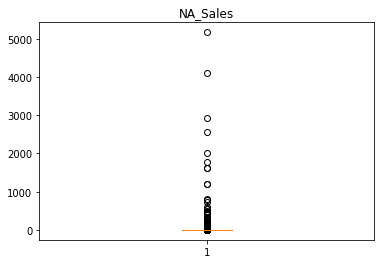

0.10240705579714583
0.275


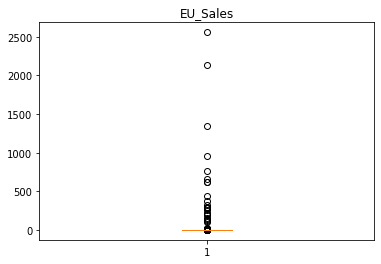

0.12598762785569914
0.1


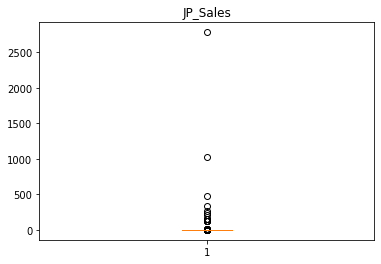

0.14705702211061433
0.075


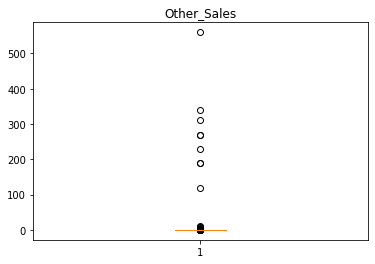

0.13676731793960922


In [ ]:
for col in col_list:
  q1, q3 = np.quantile(df_float[col], 0.25), np.quantile(df_float[col], 0.75)
  iqr = q3 - q1
  lowest = q1 - iqr * 1.5
  highest = q3 + iqr * 1.5
  print(highest)
  plt.boxplot(df_float[col])
  plt.title('%s' % col)
  plt.show()
  outlier_index = df_float[col][(df_float[col] < lowest) | (df_float[col] > highest)].index
  print(len(outlier_index) / len(df_float[col]))

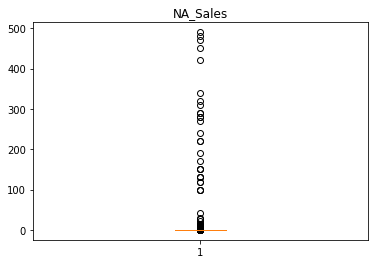

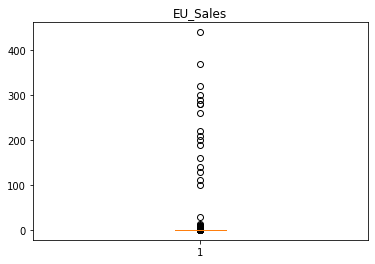

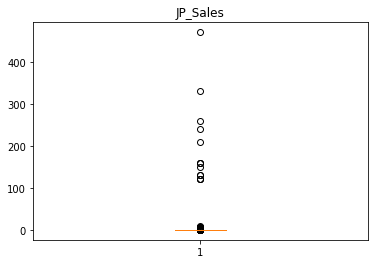

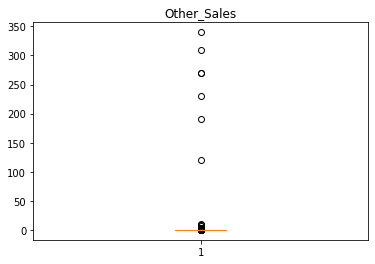

In [ ]:
for col in col_list:
  outlier_index = df_float[col][df_float[col] > 500].index
  df_float.drop(outlier_index, axis = 0, inplace = True)
  df_float.reset_index(drop=True, inplace = True)
  plt.boxplot(df_float[col])
  plt.title('%s' % col)
  plt.show()

In [ ]:
for col in col_list:
  print('%s' % col)
  for i in [100, 200, 300, 400]:
    outlier_index = df_float[col][df_float[col] > i].index
    print('Ratio of %s: %s' % (i, len(outlier_index) / len(df_float[col])))

NA_Sales
Ratio of 100: 0.0015950920245398773
Ratio of 200: 0.00098159509202454
Ratio of 300: 0.00049079754601227
Ratio of 400: 0.00030674846625766873
EU_Sales
Ratio of 100: 0.00098159509202454
Ratio of 200: 0.0006134969325153375
Ratio of 300: 0.00018404907975460124
Ratio of 400: 6.134969325153375e-05
JP_Sales
Ratio of 100: 0.0008588957055214724
Ratio of 200: 0.00030674846625766873
Ratio of 300: 0.0001226993865030675
Ratio of 400: 6.134969325153375e-05
Other_Sales
Ratio of 100: 0.0004294478527607362
Ratio of 200: 0.00030674846625766873
Ratio of 300: 0.0001226993865030675
Ratio of 400: 0.0


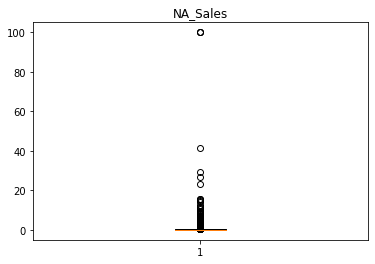

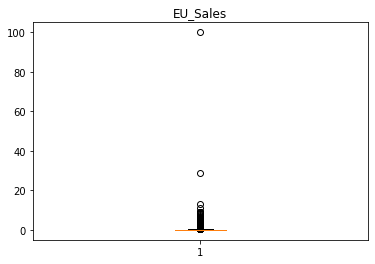

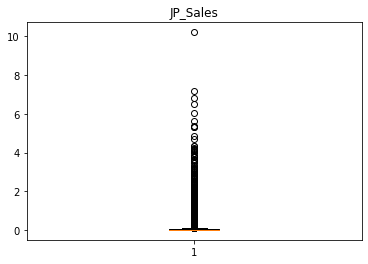

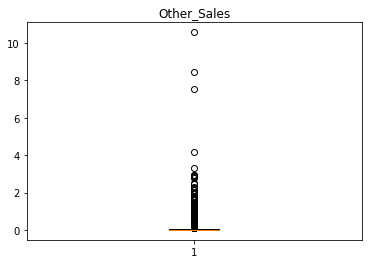

In [ ]:
for col in col_list:
  outlier_index = df_float[col][df_float[col] > 100].index
  df_float.drop(outlier_index, axis = 0, inplace = True)
  df_float.reset_index(drop=True, inplace = True)
  plt.boxplot(df_float[col])
  plt.title('%s' % col)
  plt.show()

In [ ]:
df_float.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16237.000000,16237.000000,16237.000000,16237.000000
mean,0.278457,0.150642,0.077294,0.047631
std,1.581502,0.929234,0.307629,0.189520
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,100.000000,100.000000,10.220000,10.570000


In [82]:
import re

def has_str(inputString):
  return bool(re.search('[K, k]',  inputString))

In [43]:
for col in col_list:
  str_con = df_clean[col].apply(has_str)
  has_str_names = df_clean[str_con]
  print(has_str_names)
  print(len(has_str_names))

                               Name Platform  Year         Genre  \
66     Resident Evil: Revelations 2      PS3  2015        Action   
174                 Madden NFL 2001      N64  2000        Sports   
200                   Mortal Kombat      PSV  2012      Fighting   
234              TOCA Race Driver 3       PC  2006        Racing   
417                        NBA 2K12      PS3  2011        Sports   
...                             ...      ...   ...           ...   
15840      Final Fantasy IV Advance      GBA  2005  Role-Playing   
16085               Hospital Tycoon       PC  2007      Strategy   
16097    Justice League: Chronicles      GBA  2003      Platform   
16113     Championship Manager 2010       PC  2009        Sports   
16590          Gex: Enter the Gecko       PS  1998      Platform   

                                    Publisher NA_Sales EU_Sales JP_Sales  \
66                                     Capcom      60K     0.08     0.16   
174                           E

In [ ]:
# K에 해당하는 항목들을 먼저 추출하여 float로 바꿔준 뒤 단위 조정

In [45]:
col_list

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

In [60]:
str_con = df_clean[col_list[0]].apply(has_str)
has_str_NA = df_clean[str_con]

str_con = df_clean[col_list[1]].apply(has_str)
has_str_EU = df_clean[str_con]

str_con = df_clean[col_list[2]].apply(has_str)
has_str_JP = df_clean[str_con]

str_con = df_clean[col_list[3]].apply(has_str)
has_str_Other = df_clean[str_con]
# print(has_str_names)
# print(len(has_str_names))

In [61]:
has_str_NA['NA_Sales']

66         60K
174       600K
200       470K
234         0K
417      1610K
         ...  
15840     270K
16085       0K
16097      30K
16113       0K
16590     320K
Name: NA_Sales, Length: 95, dtype: object

In [62]:
has_str_NA['NA_Sales'] = has_str_NA['NA_Sales'].str.extract('(\d+)').astype('float')
has_str_NA['NA_Sales']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


66         60.0
174       600.0
200       470.0
234         0.0
417      1610.0
          ...  
15840     270.0
16085       0.0
16097      30.0
16113       0.0
16590     320.0
Name: NA_Sales, Length: 95, dtype: float64

In [63]:
has_str_NA['NA_Sales'].sort_values()

8339        0.0
10703       0.0
11101       0.0
11122       0.0
11333       0.0
          ...  
7270     2010.0
15231    2570.0
7082     2930.0
2554     4100.0
8928     5170.0
Name: NA_Sales, Length: 95, dtype: float64

(array([79.,  6.,  2.,  4.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([   0.,  517., 1034., 1551., 2068., 2585., 3102., 3619., 4136.,
        4653., 5170.]),
 <a list of 10 Patch objects>)

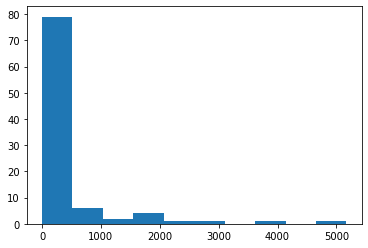

In [56]:
plt.hist(has_str_NA['NA_Sales'])

In [58]:
has_str_NA['NA_Sales_scaled'] = has_str_NA['NA_Sales'] / 1000
has_str_NA['NA_Sales_scaled']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


66       0.00006
174      0.00060
200      0.00047
234      0.00000
417      0.00161
          ...   
15840    0.00027
16085    0.00000
16097    0.00003
16113    0.00000
16590    0.00032
Name: NA_Sales_scaled, Length: 95, dtype: float64

In [66]:
has_str_scaled = pd.DataFrame()
has_str_scaled['NA_Sales'] = has_str_NA['NA_Sales'] / 1000
has_str_scaled

,NA_Sales
66,0.06
174,0.60
200,0.47
234,0.00
417,1.61
...,...
15840,0.27
16085,0.00
16097,0.03
16113,0.00


(array([79.,  6.,  2.,  4.,  1.,  1.,  0.,  1.,  0.,  1.]),
 array([0.   , 0.517, 1.034, 1.551, 2.068, 2.585, 3.102, 3.619, 4.136,
        4.653, 5.17 ]),
 <a list of 10 Patch objects>)

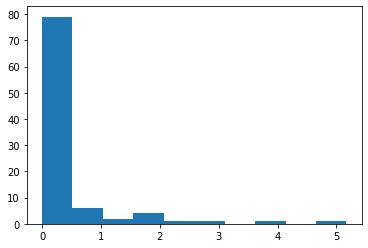

In [67]:
plt.hist(has_str_scaled['NA_Sales'])

In [82]:
df_clean_copy = df_clean.copy()

In [84]:
has_str_scaled = pd.DataFrame()
for col in col_list:
  str_con = df_clean_copy[col].apply(has_str)
  has_str_names = df_clean_copy[str_con]
  has_str_names[col] = has_str_names[col].str.extract('(\d+)').astype('float')
  has_str_scaled[col] = has_str_names[col] / 1000
  df_clean_copy.drop(df_clean_copy[str_con].index, inplace = True)
  # print(has_str_names)
  # print(len(has_str_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [86]:
has_str_scaled['EU_Sales'].isnull().sum()

95

In [99]:
has_str_scaled = pd.DataFrame()
for col in col_list:
  has_str_names = pd.DataFrame()
  str_con = df_clean[col].apply(has_str)
  has_str_names = df_clean[str_con]
  has_str_names[col] = has_str_names[col].str.extract('(\d+)').astype('float')
  has_str_scaled[col] = has_str_names[col] / 1000
  print(has_str_names[col])
  print(has_str_scaled[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


66         60.0
174       600.0
200       470.0
234         0.0
417      1610.0
          ...  
15840     270.0
16085       0.0
16097      30.0
16113       0.0
16590     320.0
Name: NA_Sales, Length: 95, dtype: float64
66       0.06
174      0.60
200      0.47
234      0.00
417      1.61
         ... 
15840    0.27
16085    0.00
16097    0.03
16113    0.00
16590    0.32
Name: NA_Sales, Length: 95, dtype: float64
215       50.0
449       20.0
844        0.0
851      320.0
893       10.0
         ...  
15865      0.0
15976     20.0
16217      0.0
16359     70.0
16564      0.0
Name: EU_Sales, Length: 99, dtype: float64
66      NaN
174     NaN
200     NaN
234     NaN
417     NaN
         ..
15840   NaN
16085   NaN
16097   NaN
16113   NaN
16590   NaN
Name: EU_Sales, Length: 95, dtype: float64
38         0.0
501        0.0
569        0.0
663        0.0
754        0.0
         ...  
15475     80.0
15491      0.0
15576      0.0
15677    120.0
16453      0.0
Name: JP_Sales, Length: 98, dtype: f

In [88]:
has_str_scaled

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
66,0.06,NaN,NaN,NaN
174,0.60,NaN,NaN,NaN
200,0.47,NaN,NaN,NaN
234,0.00,NaN,NaN,NaN
417,1.61,NaN,NaN,NaN
...,...,...,...,...
15840,0.27,NaN,NaN,NaN
16085,0.00,NaN,NaN,NaN
16097,0.03,NaN,NaN,NaN
16113,0.00,NaN,NaN,NaN


In [92]:
has_str_scale = pd.DataFrame()
str_con = df_clean['EU_Sales'].apply(has_str)
has_str_names = df_clean[str_con]
has_str_names['EU_Sales'] = has_str_names['EU_Sales'].str.extract('(\d+)').astype('float')
has_str_scale['EU_Sales'] = has_str_names['EU_Sales'] / 1000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [93]:
has_str_scale

,EU_Sales
215,0.05
449,0.02
844,0.00
851,0.32
893,0.01
...,...
15865,0.00
15976,0.02
16217,0.00
16359,0.07


In [95]:
str_con = df_clean[col_list[0]].apply(has_str)
has_str_names = df_clean[str_con]
has_str_scale_NA = df_clean[str_con]
has_str_names[col_list[0]] = has_str_names[col_list[0]].str.extract('(\d+)').astype('float')
has_str_scale_NA[col_list[0]] = has_str_names[col_list[0]] / 1000
has_str_scale_NA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
66,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,0.06,0.08,0.16,0.03,True
174,Madden NFL 2001,N64,2000,Sports,Electronic Arts,0.60,0.03,0,0.01,True
200,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,0.47,0.18,0,0.12,True
234,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0.00,0.02,0,0,True
417,NBA 2K12,PS3,2011,Sports,Take-Two Interactive,1.61,0.27,0.05,0.18,True
...,...,...,...,...,...,...,...,...,...,...
15840,Final Fantasy IV Advance,GBA,2005,Role-Playing,Nintendo,0.27,0.1,0.22,0.01,False
16085,Hospital Tycoon,PC,2007,Strategy,Codemasters,0.00,0.01,0,0,False
16097,Justice League: Chronicles,GBA,2003,Platform,Midway Games,0.03,0.01,0,0,False
16113,Championship Manager 2010,PC,2009,Sports,Eidos Interactive,0.00,0.01,0,0,False


In [96]:
str_con = df_clean[col_list[1]].apply(has_str)
has_str_names = df_clean[str_con]
has_str_scale_EU = df_clean[str_con]
has_str_names[col_list[1]] = has_str_names[col_list[1]].str.extract('(\d+)').astype('float')
has_str_scale_EU[col_list[1]] = has_str_names[col_list[1]] / 1000
has_str_scale_EU

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
215,Warriors Orochi 3,PS4,2014,Action,Tecmo Koei,0.04,0.05,0.04,0.02,True
449,Yourself Fitness,PS2,2005,Sports,responDESIGN,0.02,0.02,0,0.01,True
844,SNK Arcade Classics Vol. 1,Wii,2008,Misc,Ignition Entertainment,0.06,0.00,0,0.01,True
851,Need For Speed: Undercover,PSP,2008,Racing,Electronic Arts,0.23,0.32,0.03,0.19,True
893,Barbie as The Island Princess,DS,2007,Adventure,Activision,0.28,0.01,0,0.02,True
...,...,...,...,...,...,...,...,...,...,...
15865,Houkago Shounen,DS,2008,Misc,Konami Digital Entertainment,0,0.00,0.05,0,False
15976,Sonny with a Chance,DS,2010,Action,Disney Interactive Studios,0.12,0.02,0,0.01,False
16217,The Legend of the Mystical Ninja,SNES,1991,Adventure,Konami Digital Entertainment,0,0.00,0.48,0,False
16359,The Sims 2: Ikea Home Stuff,PC,2008,Simulation,Electronic Arts,0,0.07,0,0.02,False


In [97]:
str_con = df_clean[col_list[2]].apply(has_str)
has_str_names = df_clean[str_con]
has_str_scale_JP = df_clean[str_con]
has_str_names[col_list[2]] = has_str_names[col_list[2]].str.extract('(\d+)').astype('float')
has_str_scale_JP[col_list[2]] = has_str_names[col_list[2]] / 1000
has_str_scale_JP

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
38,Dr. Muto,XB,2002,Platform,Midway Games,0.04,0.01,0.00,0,True
501,The Urbz: Sims in the City,PS2,2004,Simulation,Electronic Arts,0.52,0.95,0.00,0.29,True
569,Tiger Woods PGA Tour 2005,GC,2004,Sports,Electronic Arts,0.1,0.03,0.00,0,True
663,Mafia,XB,2004,Action,Take-Two Interactive,0.17,0.05,0.00,0.01,True
754,Rudolph the Red-Nosed Reindeer,Wii,2010,Action,Crave Entertainment,0.15,0,0.00,0.01,True
...,...,...,...,...,...,...,...,...,...,...
15475,Dangerous Ji-San to 1000-nin no Otomodachi Yok...,3DS,2012,Action,Namco Bandai Games,0,0,0.08,0,False
15491,R.B.I. Baseball 2016,XOne,2016,Sports,MLB.com,0.04,0,0.00,0,False
15576,Sins of a Solar Empire: Trinity,PC,2010,Strategy,Kalypso Media,0,0.03,0.00,0.01,False
15677,Eyeshield 21: Max Devil Power,DS,2006,Role-Playing,Nintendo,0,0,0.12,0,False


In [98]:
str_con = df_clean[col_list[3]].apply(has_str)
has_str_names = df_clean[str_con]
has_str_scale_Other = df_clean[str_con]
has_str_names[col_list[3]] = has_str_names[col_list[3]].str.extract('(\d+)').astype('float')
has_str_scale_Other[col_list[3]] = has_str_names[col_list[3]] / 1000
has_str_scale_Other

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
248,Tom Clancy's Rainbow Six: Vegas 2,X360,2008,Shooter,Ubisoft,1.56,0.61,0.02,0.23,True
604,The Dog Island,PS2,2007,Adventure,Ubisoft,0.13,0.1,0,0.03,True
690,FIFA 14,PC,2013,Sports,Electronic Arts,0.01,0.36,0,0.06,True
837,Tomb Raider,PC,1996,Action,Eidos Interactive,0.96,0.07,0,0.00,True
953,LEGO Star Wars II: The Original Trilogy,GC,2006,Action,LucasArts,0.75,0.19,0,0.03,True
...,...,...,...,...,...,...,...,...,...,...
15375,XXX,GBA,2002,Action,Activision,0.08,0.03,0,0.00,False
15401,Super Robot Taisen Impact,PS2,2002,Strategy,Banpresto,0,0,0.65,0.00,False
15471,Nanotek Warrior,PS,1997,Shooter,Virgin Interactive,0.01,0.01,0,0.00,False
15531,Zombie Hunters 2,PS2,2006,Action,Essential Games,0,0,0.02,0.00,False


In [100]:
for col in col_list:
  str_con = df_clean[col].apply(has_str)
  df_clean.drop(df_clean[str_con].index, inplace = True)

In [101]:
df_clean.shape

(15943, 10)

In [102]:
df_final = pd.concat([df_clean, has_str_scale_NA, has_str_scale_EU, has_str_scale_JP, has_str_scale_Other])
df_final.shape

(16332, 10)

In [108]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16332 entries, 0 to 15607
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16332 non-null  object 
 1   Platform     16332 non-null  object 
 2   Year         16332 non-null  object 
 3   Genre        16302 non-null  object 
 4   Publisher    16332 non-null  object 
 5   NA_Sales     16332 non-null  float64
 6   EU_Sales     16332 non-null  float64
 7   JP_Sales     16332 non-null  float64
 8   Other_Sales  16332 non-null  float64
 9   Dup          16332 non-null  bool   
dtypes: bool(1), float64(4), object(5)
memory usage: 1.3+ MB


In [105]:
for col in col_list:
  df_final[col] = df_final[col].str.extract('(\d+.\d+)').astype('float')
df_final.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,NaN,NaN,NaN,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,NaN,NaN,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,NaN,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,NaN,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,NaN,0.04,True


In [107]:
for col in col_list:
  df_final[col].fillna(0, inplace = True)
df_final.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.0,0.00,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,0.00,0.0,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.0,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,0.0,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0.0,0.04,True


In [110]:
df_final.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
count,16332.000000,16332.000000,16332.000000,16332.000000
mean,0.340681,0.183329,0.087416,0.059614
std,7.476491,4.876010,1.289003,1.498391
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,820.000000,620.000000,160.000000,190.000000


0.6


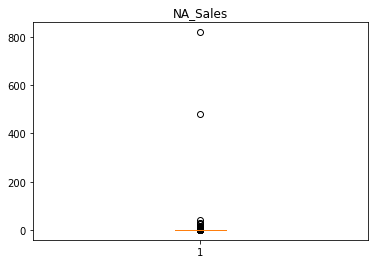

0.1108843537414966
0.17500000000000002


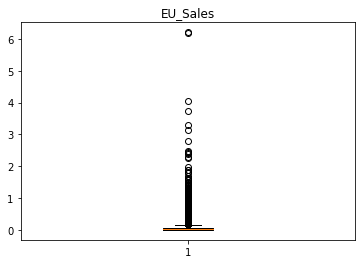

0.13163972286374134
0.075


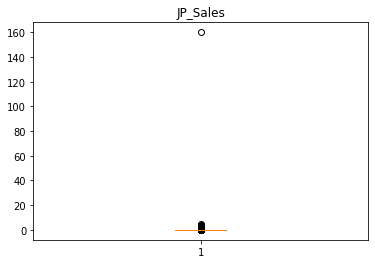

0.19615065844000368
0.05


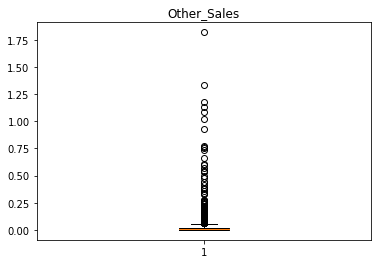

0.029191545825040282


In [113]:
for col in col_list:
  q1, q3 = np.quantile(df_final[col], 0.25), np.quantile(df_final[col], 0.75)
  iqr = q3 - q1
  lowest = q1 - iqr * 1.5
  highest = q3 + iqr * 1.5
  print(highest)
  plt.boxplot(df_final[col])
  plt.title('%s' % col)
  plt.show()
  outlier_index = df_final[col][(df_final[col] < lowest) | (df_final[col] > highest)].index
  df_final.drop(outlier_index, axis = 0, inplace = True)
  print(len(outlier_index) / len(df_final[col]))

In [114]:
df_final.shape

(10551, 10)

In [116]:
df_final.reset_index(drop = True, inplace = True)
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00,True
1,Candace Kane's Candy Factory,Wii,2008,Action,Destineer,0.14,0.00,0.00,0.01,True
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,True
3,Ben 10 Ultimate Alien: Cosmic Destruction,DS,2010,Platform,D3Publisher,0.22,0.08,0.00,0.03,True
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS2,2010,Platform,D3Publisher,0.13,0.06,0.00,0.04,True
...,...,...,...,...,...,...,...,...,...,...
10546,Invizimals: The Alliance,PSV,2013,Action,Sony Computer Entertainment,0.00,0.05,0.00,0.00,False
10547,XXX,GBA,2002,Action,Activision,0.08,0.03,0.00,0.00,False
10548,Nanotek Warrior,PS,1997,Shooter,Virgin Interactive,0.01,0.01,0.00,0.00,False
10549,Zombie Hunters 2,PS2,2006,Action,Essential Games,0.00,0.00,0.02,0.00,False


In [125]:
df_final = df_final.sort_values('Year')
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
9692,Strider 2,PS,0,Platform,Virgin Interactive,0.05,0.03,0.00,0.01,False
10228,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,False
9110,Casual Mania!,DS,10,Puzzle,Foreign Media Games,0.04,0.00,0.00,0.00,False
6272,Gunblade NY & L.A. Machineguns Arcade Hits Pack,Wii,10,Shooter,Sega,0.06,0.01,0.00,0.01,False
7347,Ys: The Oath in Felghana,PSP,10,Role-Playing,Falcom Corporation,0.09,0.00,0.04,0.01,False
...,...,...,...,...,...,...,...,...,...,...
10113,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0.00,0.00,0.02,0.00,False
8394,3D Baseball,PS,96,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00,False
8242,AeroFighters Assault,N64,97,Action,Video System,0.15,0.04,0.00,0.00,False
4864,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,False


In [126]:
df_final['Year'] = df_final['Year'].astype('int')
# df_final['Year'] = df_final['Year'].astype('str')

In [129]:
df_twenty_zero = df_final[df_final['Year'] < 10]
# df_twenty
df_twenty_zero['Year'] = df_twenty_zero['Year'].astype('str')
df_twenty_zero['Year'] = '200' + df_twenty_zero['Year']
df_twenty_zero

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
9692,Strider 2,PS,2000,Platform,Virgin Interactive,0.05,0.03,0.00,0.01,False
10228,Point Blank 3,PS,2000,Shooter,Namco Bandai Games,0.01,0.01,0.00,0.00,False
3601,Momotarou Dentetsu 11,GC,2002,Misc,Hudson Soft,0.00,0.00,0.07,0.00,True
3114,ESPN NFL Primetime 2002,XB,2002,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,True
4580,Rally Fusion: Race of Champions,PS2,2002,Racing,Activision,0.06,0.05,0.00,0.02,True
3191,Top Spin,XB,2003,Sports,Microsoft Game Studios,0.36,0.08,0.00,0.02,True
7753,Mega Man Network Transmission,GC,2003,Platform,Capcom,0.13,0.03,0.00,0.00,False
4157,Disney's Aladdin,GBA,2003,Platform,Capcom,0.02,0.01,0.00,0.00,True
2996,Grooverider: Slot Car Thunder,XB,2003,Racing,Encore,0.01,0.00,0.00,0.00,True
1862,The SpongeBob SquarePants Movie,XB,2004,Platform,THQ,0.40,0.12,0.00,0.02,True


In [130]:
df_twenty_ten = df_final[(df_final['Year'] >= 10) & (df_final['Year'] < 23)]
# df_twenty
df_twenty_ten['Year'] = df_twenty_ten['Year'].astype('str')
df_twenty_ten['Year'] = '20' + df_twenty_ten['Year']
df_twenty_ten

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
9110,Casual Mania!,DS,2010,Puzzle,Foreign Media Games,0.04,0.00,0.00,0.00,False
6272,Gunblade NY & L.A. Machineguns Arcade Hits Pack,Wii,2010,Shooter,Sega,0.06,0.01,0.00,0.01,False
7347,Ys: The Oath in Felghana,PSP,2010,Role-Playing,Falcom Corporation,0.09,0.00,0.04,0.01,False
4155,Dragon Age Origins: Awakening,PC,2010,Role-Playing,Electronic Arts,0.01,0.10,0.00,0.02,True
9884,Gem Quest: 4 Elements,DS,2011,Puzzle,Mastertronic,0.05,0.05,0.00,0.01,False
4168,Santa Claus Is Comin' to Town!,DS,2011,Puzzle,Crave Entertainment,0.07,0.00,0.00,0.01,True
3413,F.E.A.R. 3,X360,2011,Shooter,Warner Bros. Interactive Entertainment,0.30,0.11,0.01,0.04,True
214,NASCAR Unleashed,PS3,2011,Racing,Activision,0.09,0.00,0.00,0.01,True
8279,Ore-Sama Kingdom: Koi no Manga mo Debut o Moku...,DS,2011,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,False
5851,Toaru Kagaku no Chou Denjihou,PSP,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.06,0.00,False


In [132]:
df_ninety = df_final[(df_final['Year'] < 100) & (df_final['Year'] > 23)]
df_ninety['Year'] = df_ninety['Year'].astype('str')
df_ninety['Year'] = '19' + df_ninety['Year']
df_ninety

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
10113,Sugoi Hebereke,SNES,1994,Fighting,Sunsoft,0.00,0.00,0.02,0.00,False
8394,3D Baseball,PS,1996,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00,False
8242,AeroFighters Assault,N64,1997,Action,Video System,0.15,0.04,0.00,0.00,False
4864,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,False
1055,S.C.A.R.S,PS,1998,Racing,Ubisoft,0.05,0.03,0.00,0.01,True


In [135]:
# df_final.drop(df_twenty_ten.index, inplace=True)
# df_final.drop(df_twenty_zero.index, inplace=True)
df_final.drop(df_ninety.index, inplace=True)
df_final.append(df_twenty_ten)
df_final.append(df_twenty_zero)
df_final.append(df_ninety)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
9192,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,False
4821,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,True
10536,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,False
7872,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,False
5723,RealSports Volleyball,2600,1981,Sports,Atari,0.12,0.01,0.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...
10113,Sugoi Hebereke,SNES,1994,Fighting,Sunsoft,0.00,0.00,0.02,0.00,False
8394,3D Baseball,PS,1996,Sports,BMG Interactive Entertainment,0.02,0.01,0.00,0.00,False
8242,AeroFighters Assault,N64,1997,Action,Video System,0.15,0.04,0.00,0.00,False
4864,Treasures of the Deep,PS,1997,Action,Namco Bandai Games,0.10,0.07,0.00,0.01,False


In [136]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
9192,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,False
4821,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,True
10536,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,False
7872,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,False
5723,RealSports Volleyball,2600,1981,Sports,Atari,0.12,0.01,0.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...
2787,Lego Star Wars: The Force Awakens,X360,2016,Action,Warner Bros. Interactive Entertainment,0.04,0.06,0.00,0.01,True
4370,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,True
4369,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,True
6597,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,False


In [138]:
df_final['Year'] = df_final['Year'].astype('str')

In [140]:
df_final = df_final.sort_values('Year')
df_final.reset_index(drop=True, inplace = True)

In [141]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup
0,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,False
1,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,True
2,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,False
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,False
4,RealSports Volleyball,2600,1981,Sports,Atari,0.12,0.01,0.00,0.00,False
...,...,...,...,...,...,...,...,...,...,...
10482,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,False
10483,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,True
10484,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,False
10485,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,True


In [179]:
df_final['All_Sales'] = df_final['NA_Sales'] + df_final['EU_Sales'] + df_final['JP_Sales'] + df_final['Other_Sales']
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup,All_Sales
0,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,False,0.34
1,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,True,0.50
2,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,False,0.23
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,False,0.27
4,RealSports Volleyball,2600,1981,Sports,Atari,0.12,0.01,0.00,0.00,False,0.13
...,...,...,...,...,...,...,...,...,...,...,...
10482,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,False,0.01
10483,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,True,0.03
10484,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,False,0.01
10485,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,True,0.01


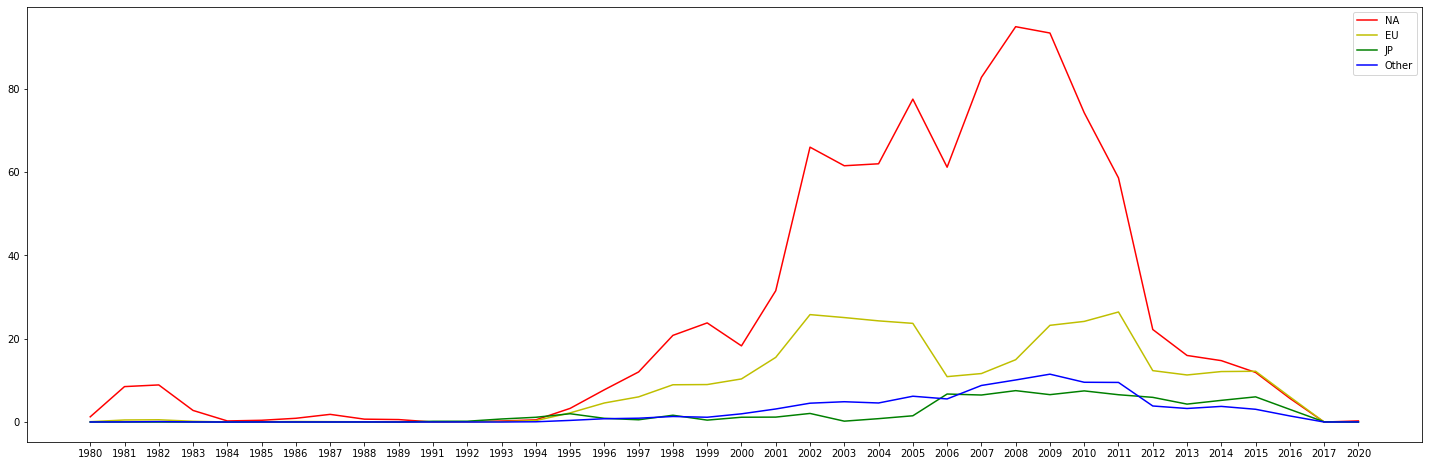

In [178]:
year_list = list(set(df_final['Year']))
year_list.sort()
plt.figure(figsize = (25, 8))
plt.plot(year_list, df_final['NA_Sales'].groupby(df_final['Year']).sum(), color = 'r', label = 'NA')
plt.plot(year_list, df_final['EU_Sales'].groupby(df_final['Year']).sum(), color = 'y', label = 'EU')
plt.plot(year_list, df_final['JP_Sales'].groupby(df_final['Year']).sum(), color = 'g', label = 'JP')
plt.plot(year_list, df_final['Other_Sales'].groupby(df_final['Year']).sum(), color = 'b', label = 'Other')
plt.legend()

In [180]:
def get_cmap(n, name = 'hsv'):
  return plt.cm.get_cmap(name, n)

In [202]:
# gen_index = df_final['Genre'].isnull()
# df_final.drop(gen_index, inplace = True)
# df_final.drop(df_final[df_final['Genre'].isnull()].index, inplace = True)
df_final = df_final.sort_values('Year')
df_final.reset_index(drop = True, inplace = True)


# df_clean.shape

In [204]:
df_final

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup,All_Sales
0,Freeway,2600,1980,Action,Activision,0.32,0.02,0.00,0.00,False,0.34
1,Ice Hockey,2600,1980,Sports,Activision,0.46,0.03,0.00,0.01,True,0.50
2,Checkers,2600,1980,Misc,Atari,0.22,0.01,0.00,0.00,False,0.23
3,Bridge,2600,1980,Misc,Activision,0.25,0.02,0.00,0.00,False,0.27
4,Fireball,2600,1981,Action,Starpath Corp.,0.30,0.02,0.00,0.00,False,0.32
...,...,...,...,...,...,...,...,...,...,...,...
10463,Haikyu!! Cross Team Match!,3DS,2016,Adventure,Namco Bandai Games,0.00,0.00,0.04,0.00,False,0.04
10464,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,True,0.01
10465,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,True,0.03
10466,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,False,0.01


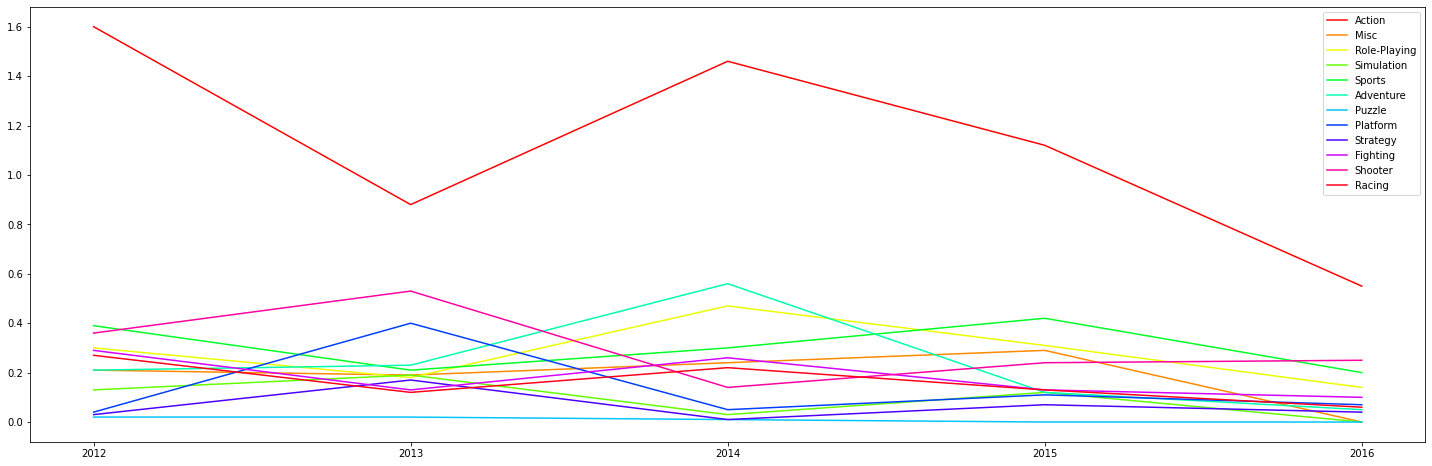

In [285]:
# year_list = list(set(df_final['Year']))
# year_list.sort()
genre_list = list(set(df_final['Genre']))
plt.figure(figsize = (25, 8))
year_df = pd.DataFrame(year_list, columns = ['Year'])
year_df

cmap = get_cmap(len(genre_list))
for i in range(len(genre_list)):
  df_all = df_final[df_final['Genre'] == genre_list[i]][['Other_Sales']].groupby(df_final['Year']).sum()
  df_all.reset_index(inplace = True)
  df_merge = pd.merge(year_df, df_all, how = 'outer', on = 'Year')
  df_merge.fillna(0, inplace = True)
  plt.plot(year_list[-7:-2], df_merge['Other_Sales'][-7:-2], color = cmap(i), label = genre_list[i])
  plt.legend()

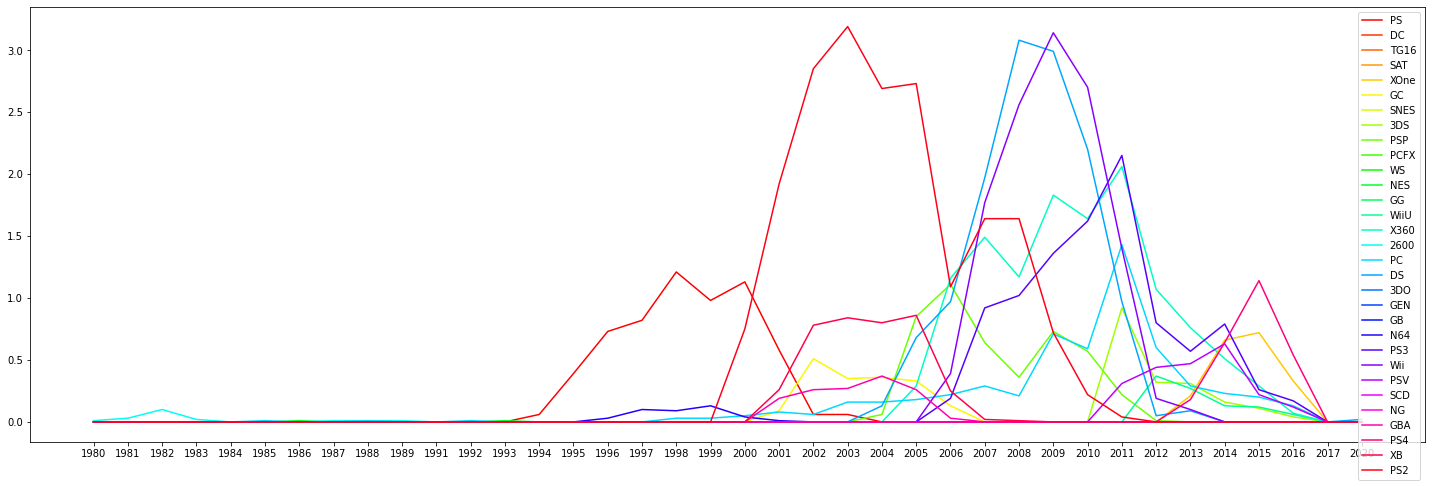

In [278]:
platform_list = list(set(df_final['Platform']))
plt.figure(figsize = (25, 8))
year_df = pd.DataFrame(year_list, columns = ['Year'])
year_df

cmap = get_cmap(len(platform_list))
for i in range(len(platform_list)):
  df_all = df_final[df_final['Platform'] == platform_list[i]][['Other_Sales']].groupby(df_final['Year']).sum()
  df_all.reset_index(inplace = True)
  df_merge = pd.merge(year_df, df_all, how = 'outer', on = 'Year')
  df_merge.fillna(0, inplace = True)
  plt.plot(year_list, df_merge['Other_Sales'], color = cmap(i), label = platform_list[i])
  plt.legend()

In [232]:
genre_list = list(set(df_final['Genre']))
df_final[df_final['Genre'] == genre_list[-1]]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Dup,All_Sales
17,Grand Prix,2600,1981,Racing,Activision,0.45,0.03,0.00,0.00,False,0.48
40,Bump 'n' Jump,2600,1982,Racing,Mattel Interactive,0.37,0.02,0.00,0.00,False,0.39
63,Beamrider,2600,1984,Racing,Activision,0.26,0.01,0.00,0.00,False,0.27
100,Rock N' Roll Racing,SNES,1993,Racing,Interplay,0.00,0.00,0.01,0.00,False,0.01
120,Virtua Racing,GEN,1994,Racing,Sega,0.00,0.00,0.00,0.00,False,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10366,MXGP 2,PS4,2016,Racing,Milestone S.r.l.,0.02,0.05,0.00,0.01,True,0.08
10388,NASCAR Heat Evolution,PS4,2016,Racing,Dusenberry Martin Racing,0.03,0.00,0.00,0.01,True,0.04
10401,NASCAR Heat Evolution,XOne,2016,Racing,Dusenberry Martin Racing,0.02,0.00,0.00,0.00,True,0.02
10444,Sébastien Loeb Rally Evo,PS4,2016,Racing,Milestone S.r.l,0.00,0.04,0.00,0.01,True,0.05


In [198]:
genre_list

['Action',
 'Misc',
 'Role-Playing',
 'Simulation',
 'Sports',
 'Adventure',
 'Puzzle',
 'Platform',
 'Strategy',
 'Fighting',
 'Shooter',
 'Racing']

In [226]:
col = list(df_final[df_final['Genre'] == genre_list[i]][['All_Sales']].groupby(df_final['Year']).sum().index)
col

['1980',
 '1981',
 '1982',
 '1983',
 '1985',
 '1987',
 '1988',
 '1989',
 '1991',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

In [245]:
year_df = pd.DataFrame(year_list, columns = ['Year'])
year_df

,Year
0,1980
1,1981
2,1982
3,1983
4,1984
5,1985
6,1986
7,1987
8,1988
9,1989


In [255]:
# df_final[df_final['Genre'] == genre_list[i]]['All_Sales'].groupby(df_final['Year']).sum().unstack(fill_value = 0).stack()
df_all = df_final[df_final['Genre'] == genre_list[i]][['All_Sales']].groupby(df_final['Year']).sum()
df_all.reset_index(inplace = True)
df_all.columns.values

array(['Year', 'All_Sales'], dtype=object)

In [256]:
merge = pd.merge(year_df, df_all, how = 'outer', on = 'Year')

In [261]:
merge.fillna(0, inplace = True)
merge

,Year,All_Sales
0,1980,0.00
1,1981,0.48
2,1982,0.39
3,1983,0.00
4,1984,0.27
5,1985,0.00
6,1986,0.00
7,1987,0.00
8,1988,0.00
9,1989,0.00
